### Описание проекта

#### Описание данных

* Структура visits_info_short.csv:
  * User Id — уникальный идентификатор пользователя,
  * Region — страна пользователя,
  * Device — тип устройства пользователя,
  * Channel — идентификатор источника перехода,
  * Session Start — дата и время начала сессии,
  * Session End — дата и время окончания сессии.
* Структура orders_info_short.csv:
  * User Id — уникальный идентификатор пользователя,
  * Event Dt — дата и время покупки,
  * Revenue — сумма заказа.
* Структура costs_info_short.csv:
  * dt — дата проведения рекламной кампании,
  * Channel — идентификатор рекламного источника,
  * costs — расходы на эту кампанию.

#### Цели:

* Задача - Разобраться в причинах и помочь компании выйти в плюс.
* Выделить причины неэффективности привлечения пользователей.
* Сформулировать рекомендации для отдела маркетинга.

### Загрузите данные и подготовьте их к анализу

In [1]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta

In [2]:
#загружаем данные
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

#### Изменяем тип данных

In [3]:
#смотрим информацию по всем датасетам
print(visits.info())я
print()
print(orders.info())
print()
print(costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #

* Название столбцов сделаем в нижнем регистре
* Сделаем так чтобы названия в столбцах соответствовали 'змеиному языку'
* Во всех таблицах проблемы со столбцами где дата, изменим тип данных


In [4]:
visits.columns = visits.columns.str.lower() #переводим названия столбцов в нижний регистр
orders.columns = orders.columns.str.lower() #переводим названия столбцов в нижний регистр
costs.columns = costs.columns.str.lower() #переводим названия столбцов в нижний регистр

# переводим в змеиный регистр
visits = visits.rename(columns = {'user id':'user_id','session start': 'session_start', 'session end': 'session_end'})
orders = orders.rename(columns = {'user id':'user_id','event dt':'event_dt'})

# изменяем тип данных

visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

orders['event_dt'] = pd.to_datetime(orders['event_dt'])


costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [5]:
# проверяем изменения
print(visits.info())
print()
print(orders.info())
print()
print(costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage

#### Проверяем данные на пропуски

In [6]:
print(visits.isnull().sum())
print()
print(orders.isnull().sum())
print()
print(costs.isnull().sum())

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

user_id     0
event_dt    0
revenue     0
dtype: int64

dt         0
channel    0
costs      0
dtype: int64


Пропусков не было обнуружена, также была проведена ручная выборочная проверка (там где тип object выведены уникальные значения. Не стал включать в проект, тк это связано с небольшим сомнением к полученным результат - везде 0). 

Пропусков также не было обнаружено

#### Проверка на дубликаты

In [7]:
#проверяем на наличие дубликатов
print(visits.duplicated().sum())
print()
print(orders.duplicated().sum())
print()
print(costs.duplicated().sum())

0

0

0


Проверку на неявные дубликаты проводить не нужно по типу столбец+столбец тк дубликаты в этом случае допустимы (пример: id+канал/девайс - могло быть несколько посещений или покупок от одного и того же человека).

При ручной проверке (на уникальные названия) неявных дубликатов в название девайсов или каналов не было выявлено + при дальнейшем исследование если что-то було упущено это будет видно.

#### Проверка на аномалии

Проверим что у нас со временем сессий, может в этом и есть основная проблема

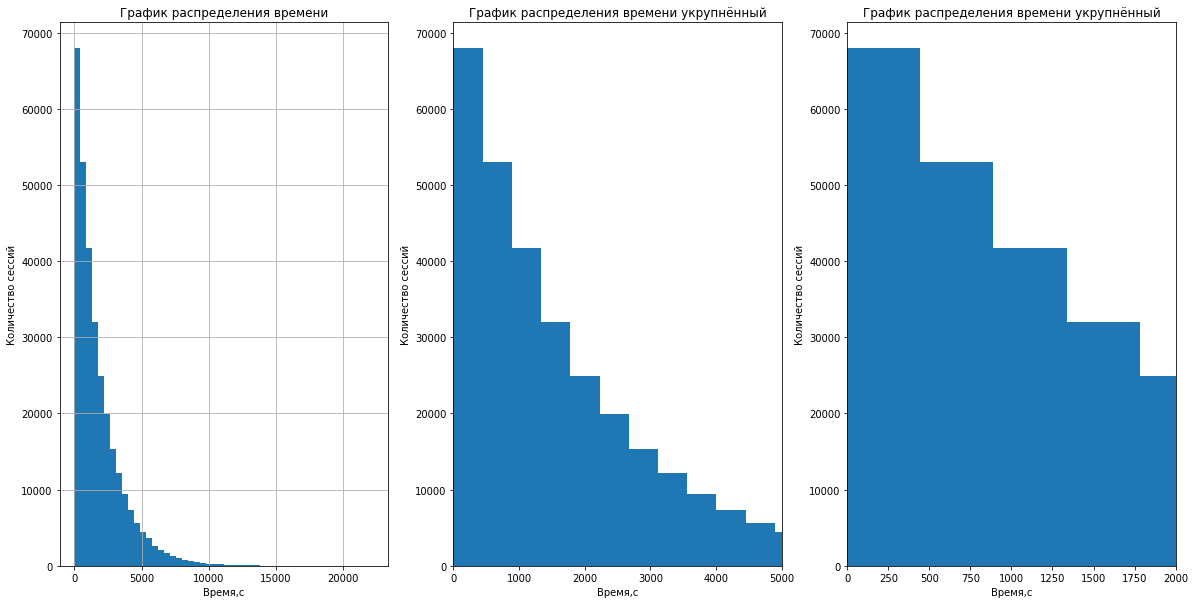

In [8]:
# рассмотрим как распределено время по сессиями
kl = visits

#считаем какое сколько времени продлилась каждая сессия
kl['sessions_second'] = (visits['session_end'] - visits['session_start']).dt.seconds 

#оставляем только нужные нам столбцы для расчёта
kl = kl[['user_id','sessions_second']]


#строим график
plt.figure(figsize=(20,10))

ax1 = plt.subplot(1,3,1)
kl['sessions_second'].hist(bins=50,ax=ax1)
plt.title('График распределения времени')
plt.xlabel('Время,c')
plt.ylabel('Количество сессий')

#строим два укрупнённых графика
ax2 = plt.subplot(1,3,2)
kl['sessions_second'].plot(kind = 'hist',bins=50,ax=ax2,xlim = (0,5000))
plt.title('График распределения времени укрупнённый')
plt.xlabel('Время,c')
plt.ylabel('Количество сессий')

ax3 = plt.subplot(1,3,3)
kl['sessions_second'].plot(kind = 'hist',bins=50,ax=ax3,xlim = (0,2000))
plt.title('График распределения времени укрупнённый')
plt.xlabel('Время,c')
plt.ylabel('Количество сессий')

plt.show()

Большое количество сессий в 0, но они убъеденены в корзину до 500 секунд, посмотрим количество сессий до 2 секунд

In [9]:
#считаем количество сессий меньше 2 секунд
count_min_sessions = kl[kl['sessions_second']<2].count()
count_min_sessions

user_id            348
sessions_second    348
dtype: int64

Количество таких сессий (меньше 2 секунд) не велико по сравнению с общим количеством сессий - существенного влияния они на результат исследования не окажут. Маленькое количество коротких сессий демонстрирует корректную работу приложения.

На аномалии можно проверить таблицу с суммой заказов, вдруг найдём какие-нибудь выбивающиеся значения

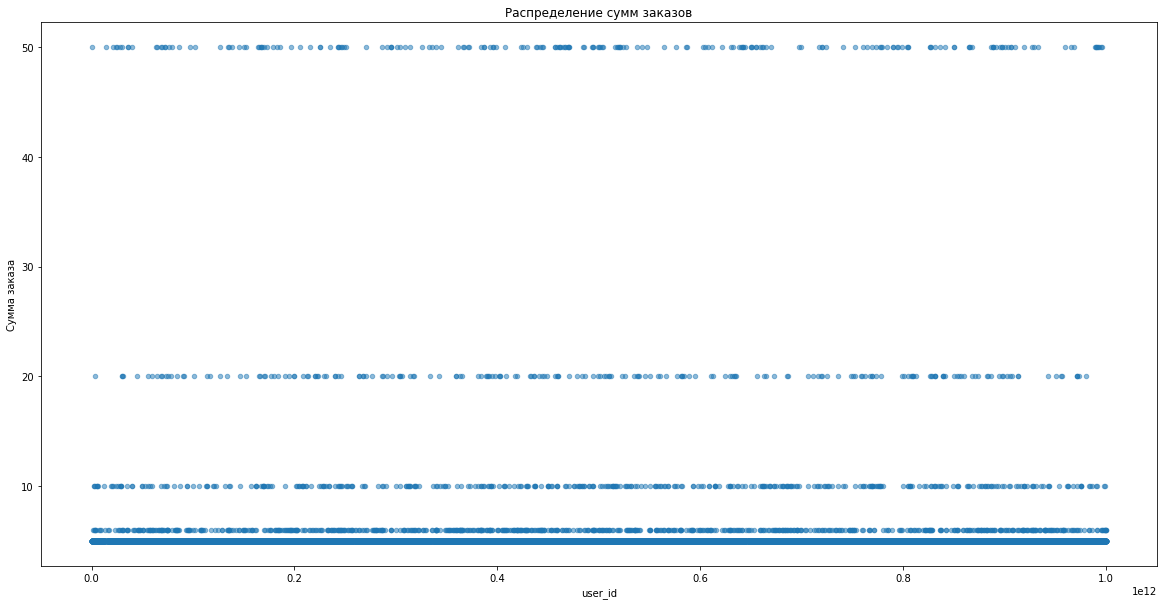

In [10]:
#строим график с суммой заказов
orders.plot(x='user_id',y='revenue',kind='scatter',alpha=0.5,figsize=(20,10))
plt.title('Распределение сумм заказов')
plt.ylabel('Сумма заказа')
plt.show()

Сверх-высоких заказов нет, немного укрупним график сузив его по оси ординат

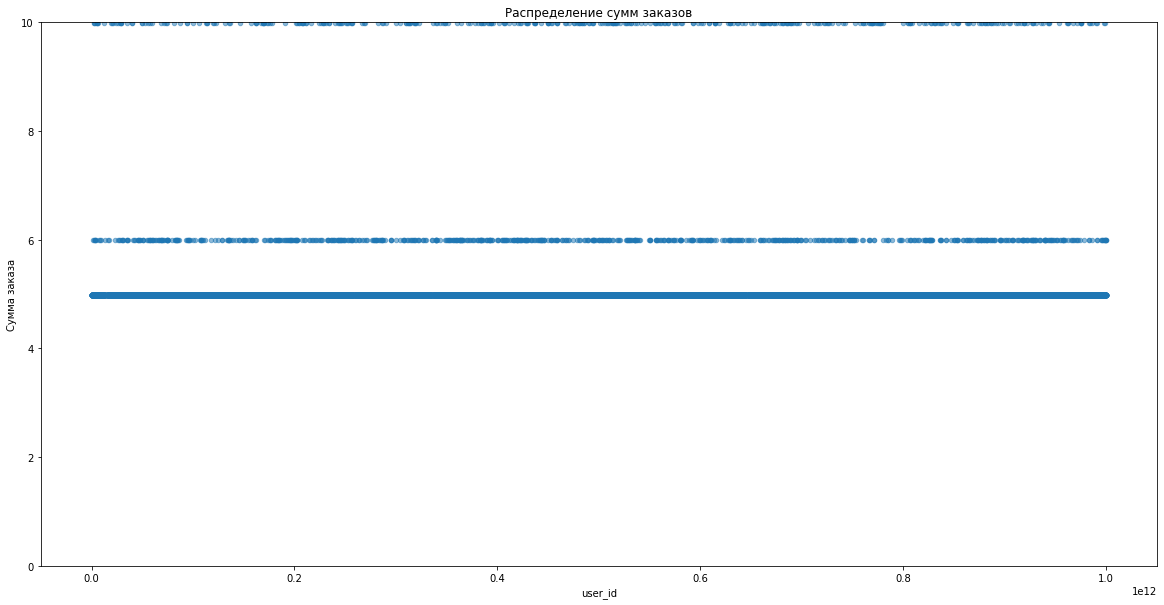

In [11]:
orders.plot(x='user_id',y='revenue',kind='scatter',alpha=0.5,figsize=(20,10),ylim = (0,10))
plt.title('Распределение сумм заказов')
plt.ylabel('Сумма заказа')
plt.show()

In [12]:
#Смотрим уникальные значения продаж
orders['revenue'].unique()

array([ 4.99,  5.99,  9.99, 49.99, 19.99])

Заказов равных 0 нет, значит всё хорошо.

Можно было бы и упростить задачу вывев только уникальные значения, но если бы какой-то чёткой суммы заказа не было как в нашем случае (по подписке), то графики были бы в самый раз.

P.S предпологалось что суммы заказов не фиксированны


#### Вывод предобработка данных
Данные весьма 'чистые' 
* были заменены типы в столбцах где должны была быть дата
* аномалий, пропусков и дубликатов не было обнаружено

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [13]:
# функция для построения профилей 
def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [14]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [15]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [16]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

In [17]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [18]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [19]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [20]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

#### Составление профилей, определение даты

In [21]:
profiles = get_profiles(visits, orders, costs)
profiles.head(10)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
5,34186288,2019-05-09 17:29:23,organic,Android,United States,2019-05-09,2019-05-01,False,0.000000
6,38448301,2019-08-16 11:56:00,organic,Android,United States,2019-08-16,2019-08-01,False,0.000000
7,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,2019-06-01,True,1.008000
8,58263264,2019-05-11 19:18:43,FaceBoom,iPhone,United States,2019-05-11,2019-05-01,False,1.128205
9,59835779,2019-05-11 21:13:47,MediaTornado,iPhone,United States,2019-05-11,2019-05-01,False,0.250435


In [22]:
# определяем максимальную и минимальную дату привлечения пользователей
print(profiles['first_ts'].min())
print(profiles['first_ts'].max())
# данные 2019 года с мая по 27 октября

2019-05-01 00:00:41
2019-10-27 23:59:04


**Промежуточный вывод**

Тк кампания терпит убытки в течение нескольких месяцев анализировать датасет за пол года не имеет смысла, рассмотрим данные за последние 3 месяца (можно взять и меньше диапазон, но таким образом можно не узнать причину неудачных рекламных кампаний)

#### Анализ пользователей по стране

Создадим функцию для того чтобы проанализировать профили

In [24]:
def anylisis_region(profiles,condition):
    # рассмотрим разбивку по условию
    profiles_condition = profiles.groupby(condition).agg({'user_id':'nunique'}).sort_values('user_id')
    #смотрим сколько пользователей пришло исходя из условия
    profiles_condition_payer = profiles.query('payer == True').groupby(condition).agg({'user_id':'nunique'}).sort_values('user_id')
    
    #Объеденяем таблицы с количеством пользователей
    profiles_general = profiles_condition.merge(profiles_condition_payer,on = [condition],how='left')
    #изменяем название столбцов
    profiles_general.columns = ['all_users','users_payer']
    
    #считаем долю платящих пользователей от числа выбранных по условию
    profiles_general['users_payer_condition'] = (profiles_general['users_payer']/profiles_general['all_users'])*100

    #сортируем таблицу по доле платящих пользователей
    profiles_general = profiles_general.sort_values(by='users_payer_condition')
    
    plt.figure(figsize=(20, 10))
    
    # строим график для общего количества пользователей в зависимости от условия
    ax1 = plt.subplot(1,2,1)
    profiles_condition.plot(kind='bar',ax=ax1)
    plt.title('Количество пользователей по {}'.format(condition))
    plt.ylabel('Количестов пользователей')
    
    #строим график для количества платящих пользователей в зависимости от условия
    ax2 = plt.subplot(1,2,2)
    profiles_condition_payer.plot(kind='bar',ax=ax2)
    plt.title('Количество платящих пользователей по {}'.format(condition))
    plt.ylabel('Количестов пользователей')
    plt.show()
    
    # построим графики для доли платящих пользователей, тк реклама подстраивается под конкретный регион/девайс и тд

    plt.figure(figsize=(20,10))
    ax1 = plt.subplot(2,2,1)
    profiles_general.plot(y='users_payer_condition',kind='bar',ax=ax1)
    plt.title('Доля платящих пользователей по {}'.format(condition))
    plt.show()
    
    return profiles_general
    
    

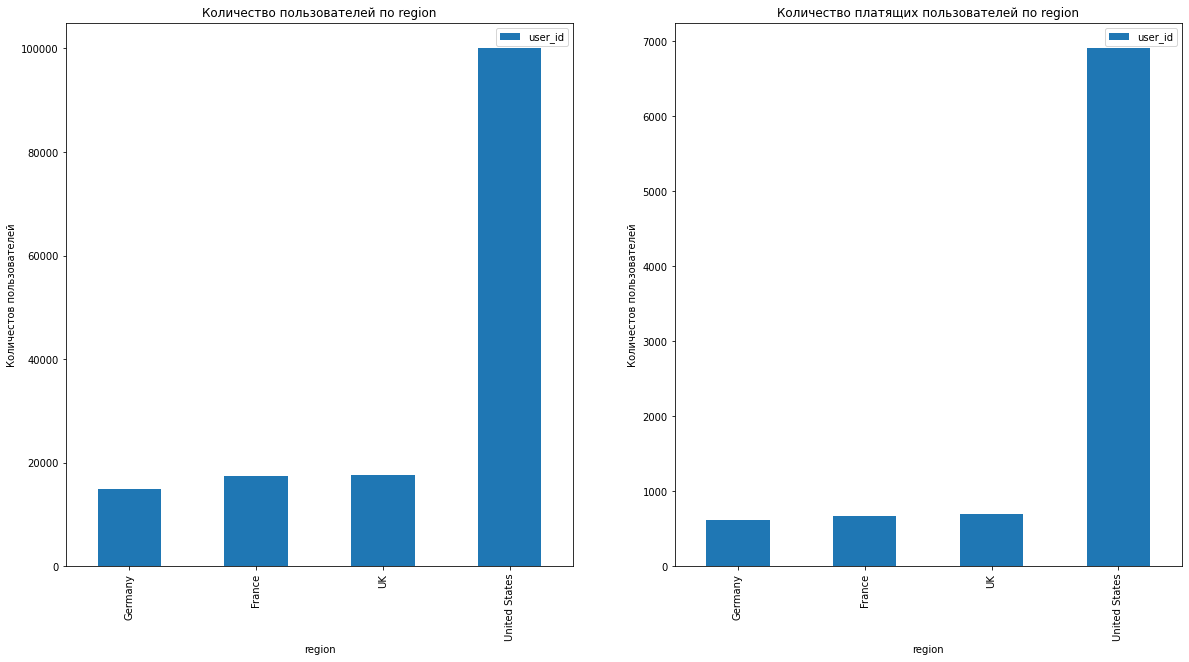

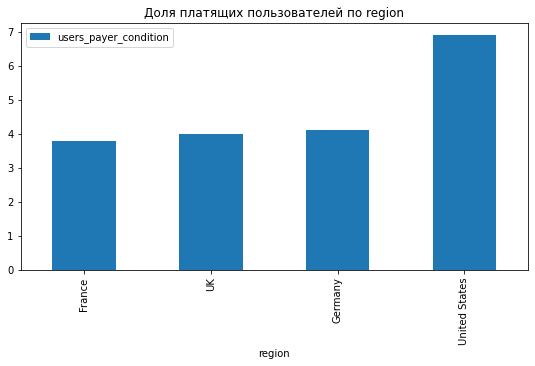

,all_users,users_payer,users_payer_condition
region,,,
France,17450,663,3.799427
UK,17575,700,3.982930
Germany,14981,616,4.111875
United States,100002,6902,6.901862


In [25]:
anylisis_region(profiles,'region')

**Промежуточный вывод**
* Больше всего пользователей из США, количество и доля платящих пользователей также больше в США, причём значительно по всем параметрам в сравнение с другими странами
* Остальные страны примерно на одном уровне

#### Анализ пользователей по устройству

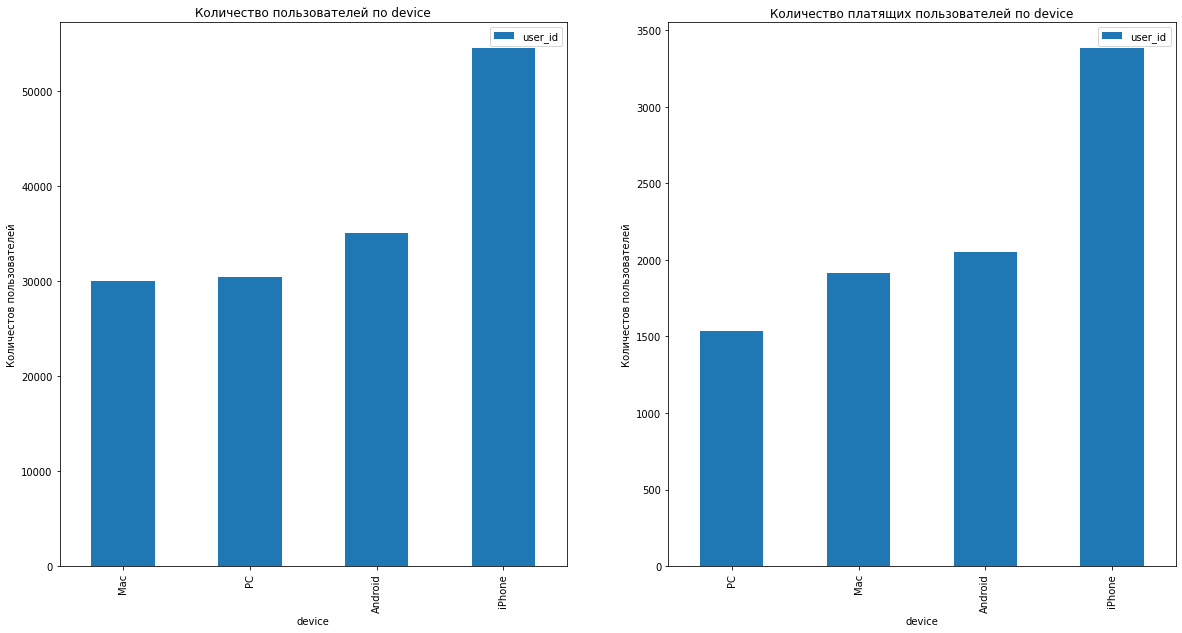

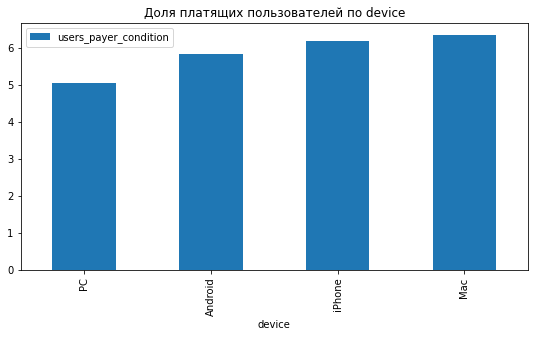

,all_users,users_payer,users_payer_condition
device,,,
PC,30455,1537,5.046790
Android,35032,2050,5.851793
iPhone,54479,3382,6.207897
Mac,30042,1912,6.364423


In [26]:
anylisis_region(profiles,'device')

<p>Промежуточный вывод</p>

<p>    <ul>
        <li> Больше всего пользователей и платящих пользователей с iphone
        <li> Доля платящих пользователей у владельцев техники Apple выше всех. Пользователи PC отстают сильнее всех
</p>

#### Анализ пользователей по каналу привлечения

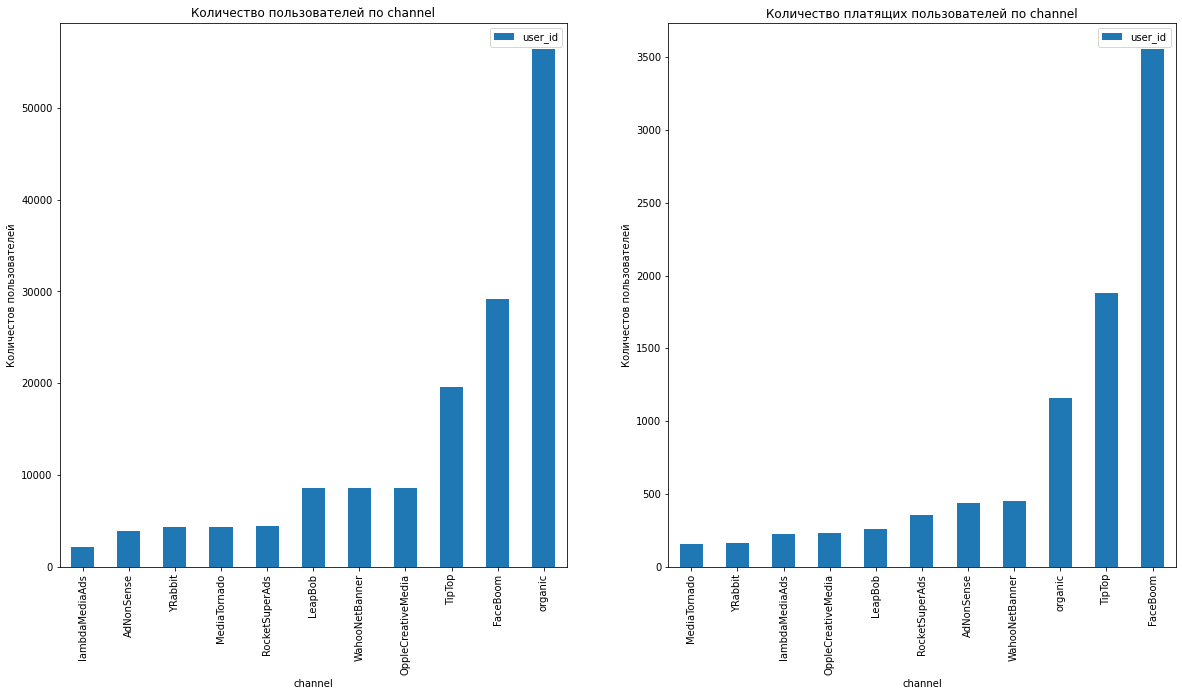

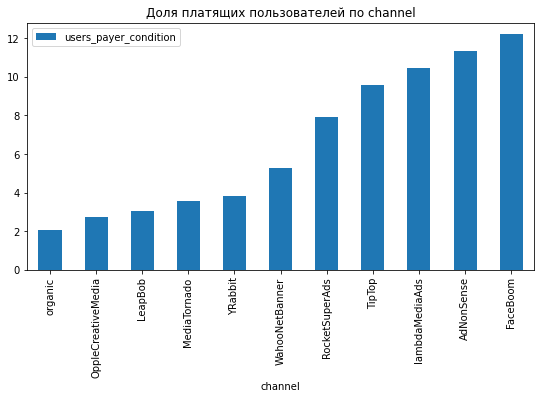

,all_users,users_payer,users_payer_condition
channel,,,
organic,56439,1160,2.055316
OppleCreativeMedia,8605,233,2.707728
LeapBob,8553,262,3.063253
MediaTornado,4364,156,3.574702
YRabbit,4312,165,3.826531
WahooNetBanner,8553,453,5.296387
RocketSuperAds,4448,352,7.913669
TipTop,19561,1878,9.600736
lambdaMediaAds,2149,225,10.469986


In [27]:
anylisis_region(profiles,'channel')

**Промежуточный вывод**
* Больше всего пользователей прищедщих самостоятельно. Каналы привлёкщие наибольшее количество пользователей: **FaceBoom** и **TipTop** 
* Количество платящих пользователей больше всего привлек канал **FaceBoom**, практически в 2 раза меньше канал **TipTop**. Далее следуют пользователи прищедщие самостоятельно. Остальные платформы очень сильно отстают.
* Доля платящих пользователей которую привлекли платформы возрастает в соответствие со списком (топ - 5):
  * RocketSuperAds
  * TipTop
  * lambdaMediaAds
  * AdNonSense
  * FaceBoom
  
  Большинство из списка этих каналов не привлекли большого количества пользователей, предположительно это может быть связано с тем что платформы представлены в одном каком-то регионе или рекламный бюджет для этих платформ был выделен слишком маленький . А высокие показатели имеют из-за того что более тщательно подбирают кому рекомендовать приложение.

#### Вывод исследовательский анализ

Если на этом этапе подбирать пользователей которым рекламировать продукцию то:
* Страна - США имеет наибольшую долю платящих. Остальные страны примерно на одинаковом уровне
* Устройство: (вывод сделан на основе доле платящих пользователей)
    * техника Apple, также имеет наибольшую долю платящих пользователей (это связано скорее всего с политикой Apple)
    * пользователи техники на платформе Android

Выбор платформы:

Здесь к сожалению ничего конкретно не известно на каких условиях происходит работа с каналом поэтому вывод будет сделан исходя из количества и качества привлечённых пользователей:
* Лидером является платформа FaceBoom - наибольшое количество привлечённых пользователей и доля платящих самая большая
* AdNonSense - имеет одну из луччших долю платящих пользователей к привлечённым

Если выбирать канал по доле привлечённых пользователей:
* FaceBoom
* TipTop - 2 место по количеству привлеченных пользователей и количеству привлечённых платящих пользователей
* lambdaMediaAds
* AdNonSense

**Предположение: возможно основываясь на этих данных и подбиралась рекламная кампания**

P.S вывод сделан из промежуточных выводов выделены наилучшие показатели. Зафиксированы основные моменты. Пытался воссоздать логику маркетологов

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

#### Считаем общую сумму расходов

Ограничим датафрейм по времени

In [28]:
# переводим в нужный формат для расчётов
costs['dt'] = pd.to_datetime(costs['dt'])

In [31]:
#считаем общую сумму расходов
sum_marketing = costs['costs'].sum()
round(sum_marketing,1)

105497.3

#### Определяем как распределены средства по каналам привлечения пользователей

,costs
channel,
YRabbit,944.22
MediaTornado,954.48
lambdaMediaAds,1557.60
LeapBob,1797.60
RocketSuperAds,1833.00
OppleCreativeMedia,2151.25
AdNonSense,3911.25
WahooNetBanner,5151.00
FaceBoom,32445.60


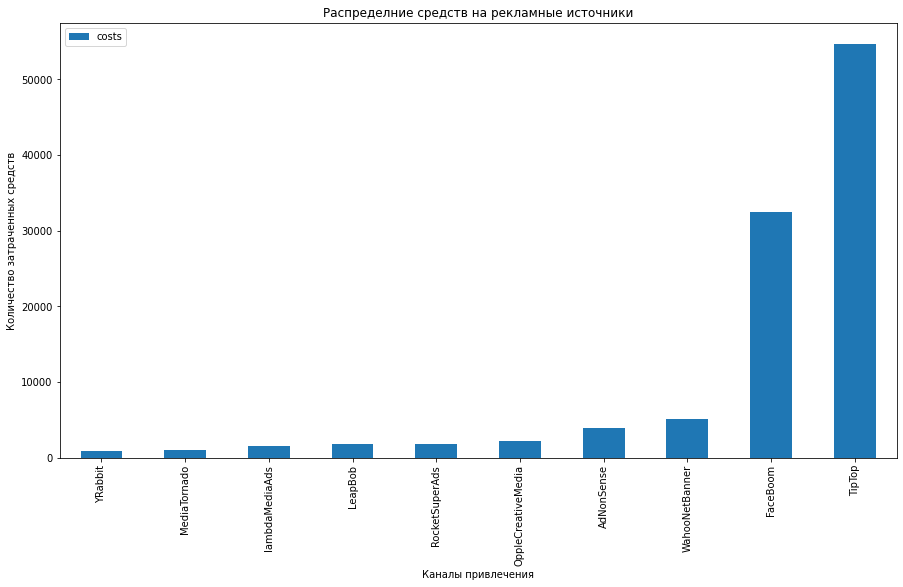

In [32]:
# групируем датафрейм с информацией о расходах по каналу привлечения и считаем сумму расходов на каждый канал
grouped_costs = costs.groupby('channel').agg({'costs':'sum'}).sort_values('costs')

#строим график
grouped_costs.plot(kind = 'bar',figsize = (15,8))
plt.title('Распределние средств на рекламные источники')
plt.xlabel('Каналы привлечения')
plt.ylabel('Количество затраченных средств')

grouped_costs

**Промежуточный вывод**
* Наибольшее количество средств выделено каналу TipTop и FaceBoom (основная часть рекламных средств). Разница между этими каналама по количеству привлечённых средств практически в 2 раза. Направление практически всех средств в 2 канала привлечения не лучшая идея
* На остальные каналы по сравнения с FaceBoom (разница с TipTop (на 1 месте по количеству средств) в 2 раза) было выделено меньше практически в 10 раз

#### Распределение затраченных средств на рекламу по месяцу и неделе

In [33]:
# добавляем в датасет с расходами месяц и неделю
cost_distribution = costs
# добавляем месяц
cost_distribution['month'] = cost_distribution['dt'].dt.month
# добавляем неделю
cost_distribution['week'] = cost_distribution['dt'].dt.isocalendar().week
# выводим информацию
cost_distribution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
 3   month    1800 non-null   int64         
 4   week     1800 non-null   UInt32        
dtypes: UInt32(1), datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 65.2+ KB


In [34]:
# формируем таблицы для вывода графиков

cost_distribution_month = cost_distribution.pivot_table(index='month',columns='channel',values = 'costs', aggfunc='sum')


cost_distribution_week = cost_distribution.pivot_table(index='week',columns='channel',values = 'costs', aggfunc='sum')


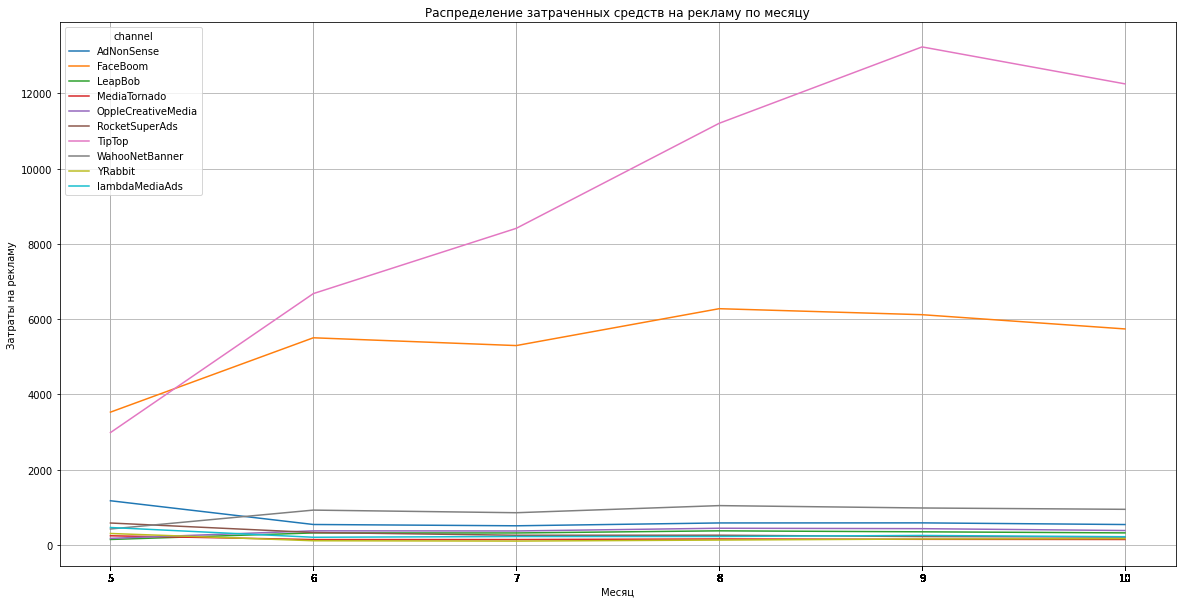

In [35]:
cost_distribution_month.plot(grid = True,figsize = (20,10),xticks = list(cost_distribution['month'].values))
plt.title('Распределение затраченных средств на рекламу по месяцу')
plt.xlabel('Месяц')
plt.ylabel('Затраты на рекламу')
plt.show()

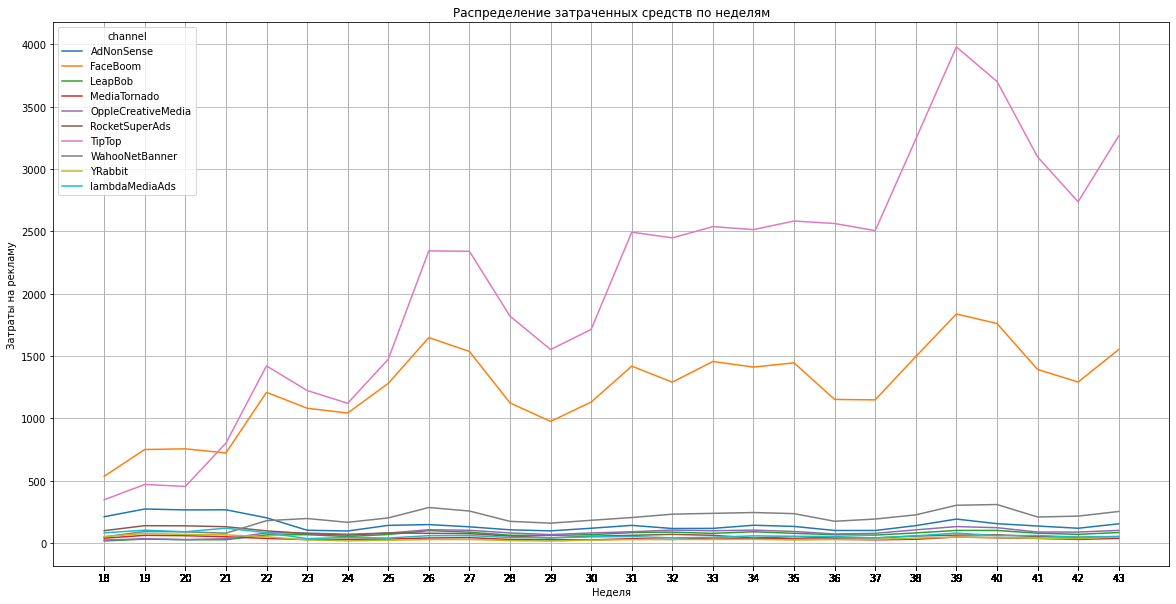

In [36]:

cost_distribution_week.plot(grid = True,figsize = (20,10),xticks = list(cost_distribution['week'].values) )
plt.title('Распределение затраченных средств по неделям')
plt.xlabel('Неделя')
plt.ylabel('Затраты на рекламу')
plt.show()

**Промежуточный вывод** 
* Распределение рекламных средств от месяцу к месяццу практически не меняется (относительно каналов). Большинство средств выделяется TipTop и FaceBoom
* Есть увеличение количества привлечённых средств но они увеличиваются для каждого канала линейно (всплеск и падения равномерные). Скорее всего были 'вливания" средств в маркетинг, но маркетологи вкладывали всё больше и больше средств в старые каналы привлечения клиентов, не анализируя ситуацию

##### Расчёт CAC для каждого канала привлечения клиентов

,acquisition_cost
channel,
organic,0.000000
LeapBob,0.210172
MediaTornado,0.218717
YRabbit,0.218975
OppleCreativeMedia,0.250000
RocketSuperAds,0.412095
WahooNetBanner,0.602245
lambdaMediaAds,0.724802
AdNonSense,1.008054


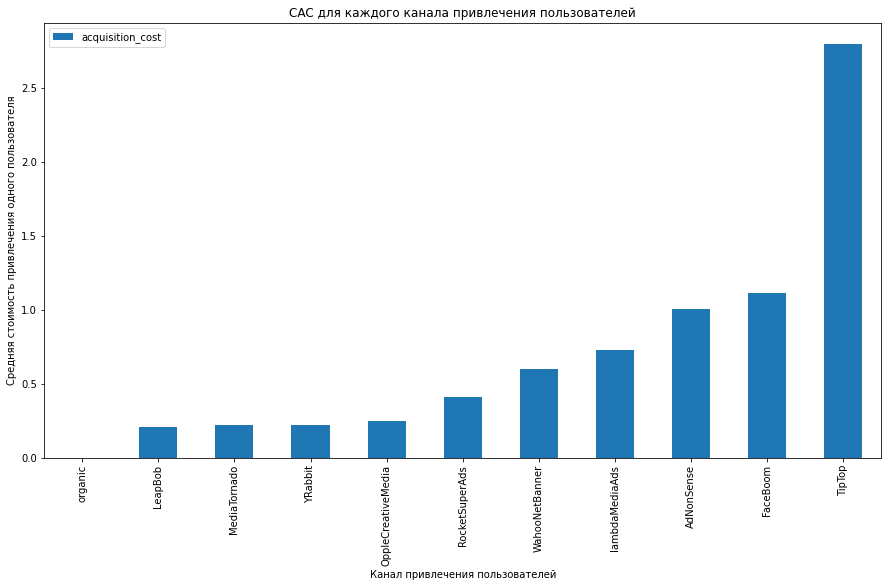

In [37]:
#группируем из таблицы profiles по каналу привлечения клиентов, считаем среднюю стоимость привлечения одного клиента
mean_acquisition_cost = profiles.groupby('channel').agg({'acquisition_cost':'mean'}).sort_values('acquisition_cost')

#строим график
mean_acquisition_cost.plot(kind='bar',figsize = (15,8))
plt.title('CAC для каждого канала привлечения пользователей')
plt.xlabel('Канал привлечения пользователей')
plt.ylabel('Средняя стоимость привлечения одного пользователя')

mean_acquisition_cost

**Средний САС по проекту**

In [38]:
mean_acquisition_cost['acquisition_cost'].mean()

0.6870317251014001

Рассмтрим без канала organic

In [39]:
mean_acquisition_cost_m = mean_acquisition_cost.reset_index()
mean_acquisition_cost_m = mean_acquisition_cost_m[mean_acquisition_cost_m['channel'] != 'organic']
mean_acquisition_cost_m['channel'].unique()

array(['LeapBob', 'MediaTornado', 'YRabbit', 'OppleCreativeMedia',
       'RocketSuperAds', 'WahooNetBanner', 'lambdaMediaAds', 'AdNonSense',
       'FaceBoom', 'TipTop'], dtype=object)

In [40]:
mean_acquisition_cost_m['acquisition_cost'].mean()

0.7557348976115401

Данное число не информативно, потому что оно показывает среднюю стоимость привлечению по компаниям, а не по количеству средств. 

In [41]:
# среднее по затраченным средствам
profiles['acquisition_cost'].mean()

0.7032778251826568

Пользователи также привлечённые органичсеки влияют на результат

In [42]:
# удаляем пользователей привлечённых органически
profiles_cac_mean = profiles[profiles['channel'] != 'organic']
profiles_cac_mean['channel'].unique()

profiles_cac_mean['acquisition_cost'].mean()

1.1274813239427588

In [43]:
profiles_cac_mean['acquisition_cost'].median()

1.0805309734513273

Последние 2 числа отражают примерную картину по стоимости привлечения одного пользователи: стоимость привлечения одного пользователя выше чем стоимость привлечения пользователя по всем имеющимся каналом кроме TipTop это также демонстрирует нам что основная часть средств уходилв в самый дорогой канал привлечения клиентов

**TipTop** является самым дорогим для привлечения одного пользователя (в 2 раза выше по сравнения со 2-м местом по стоимости привлечения (канала **FaceBoom**)), при этом конверсия в покупку нижу на 2,5% в сравнение с FaceBoom

**Промежуточный вывод**
* Очень много средств было выделено на канал **TipTop** при этом доля привлечённых пользователей была слишком низкая, цена за одного привлечённого пользователя также слишком большая
* Маркетинговая стратегия не меняется (даже когда кампания терпит убытки)
* Основные каналы на которые тратятся средства для привлечения клиентов: FaceBoom и TipTop
* CAC для большинства каналов ниже 0,8 долларов

**Предположение: именно эти каналы расположены в основном регионе (США), но если поразмышлять не может быть только 2 канала привлечения пользователей в такой стране как США. Следовательно маркетенговая стратегия очень плохая**

#### Вывод по разделу маркетинг

<p>
    <ul>
        <li> Большая часть рекламного бюджета уходит на 2 канала привлечения клиентов: </li>
     <ul>
         <li>TipTop </li> <ul>
         <li>Имеет не самую лучшую долю платящих пользователей </li>
    <li>Имеет самую высокую стоимость привлечения одного клиента (больше 2 места (FaceBoom) в 3 раза) </li> </ul>
         <li>FaceBoom</li></ul>

<li>Маркетинговая стратегия стабильна, не изменяется. Что в условиях рыночной экономики весьма плохо</li></ul>
   </p> 

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

#### Окупаемость рекламы

Включение в анализ органически пришедщих пользователей не нужно тк на них не затрачивались средства для привлечения. 

Основной задачей является узнать почему деньги заложенные в рекламу неокупились

In [44]:
# удаляем пользователей прищедщиз органически
profiles = profiles.query('channel != "organic"').reset_index(drop=True)

In [45]:
# проверяем каналы привлечения клиентов
profiles['channel'].unique()

array(['FaceBoom', 'AdNonSense', 'YRabbit', 'MediaTornado',
       'RocketSuperAds', 'LeapBob', 'TipTop', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

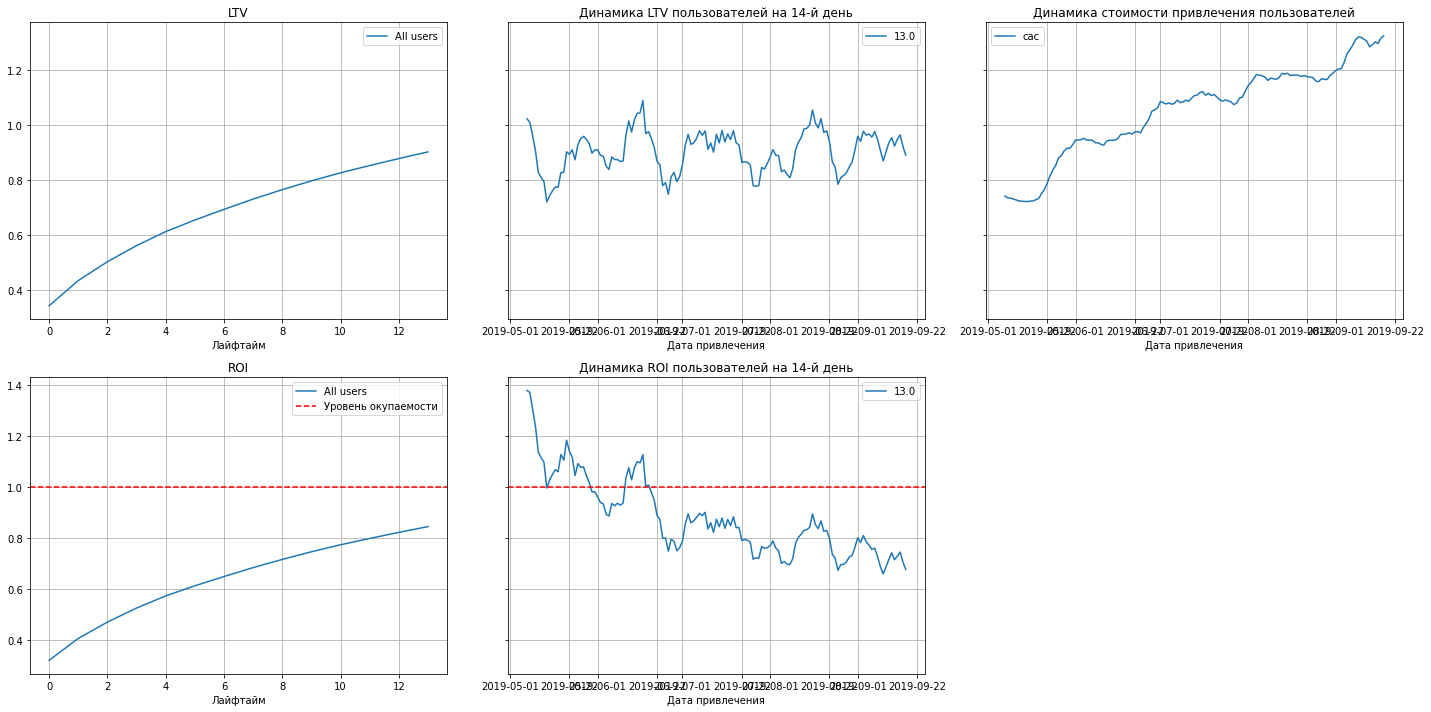

In [46]:
# зададим горизонт и момент анализа
observation_date = datetime(2019,10,1).date() #дата наблюдения
horizon_day = 14 #горизонт анализа

# используем функцию для расчёта ltv и roi
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles,orders,observation_date,horizon_day)

#строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_day,window = 7)

**Промежуточный вывод**
* Реклама не окупается ROI < 80%
* LTV стабилен (если поставить окно сглаживания в 14 дней будет практически прямая линия. Емеется провал возможно связан с сезонностью или каким-нибудь сбоем
* Стоимость привлечения пользователей растёт, а ROI падает. Это говорит о том что повышение цены за каждого привлечённого пользователя неоправдана

#### Конверсия пользователей и динамика удержания

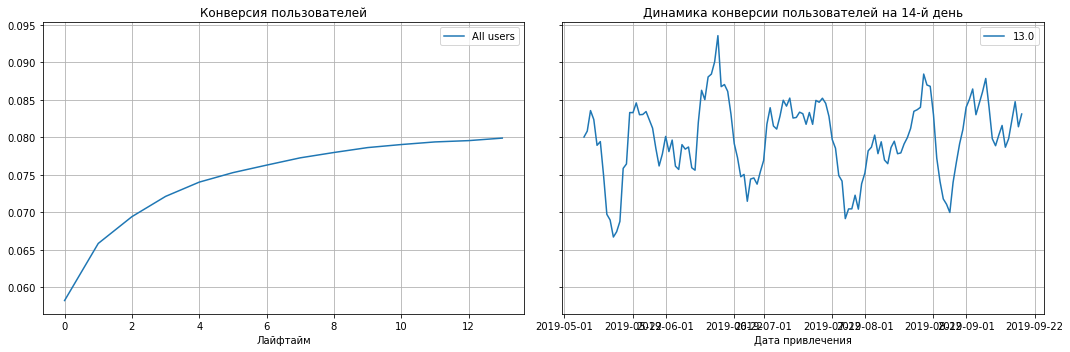

In [47]:
# используем функцию для расчёта конверсии и удержания
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_day
)

#строим графики удержания и конверсии
plot_conversion(conversion_grouped, conversion_history, horizon_day) 

<p>
  <ul>
      <li> Конверсия пользователей стабильно растёт </li>
      <li> Иногда в динамике конверсии видны провалы
</p> 

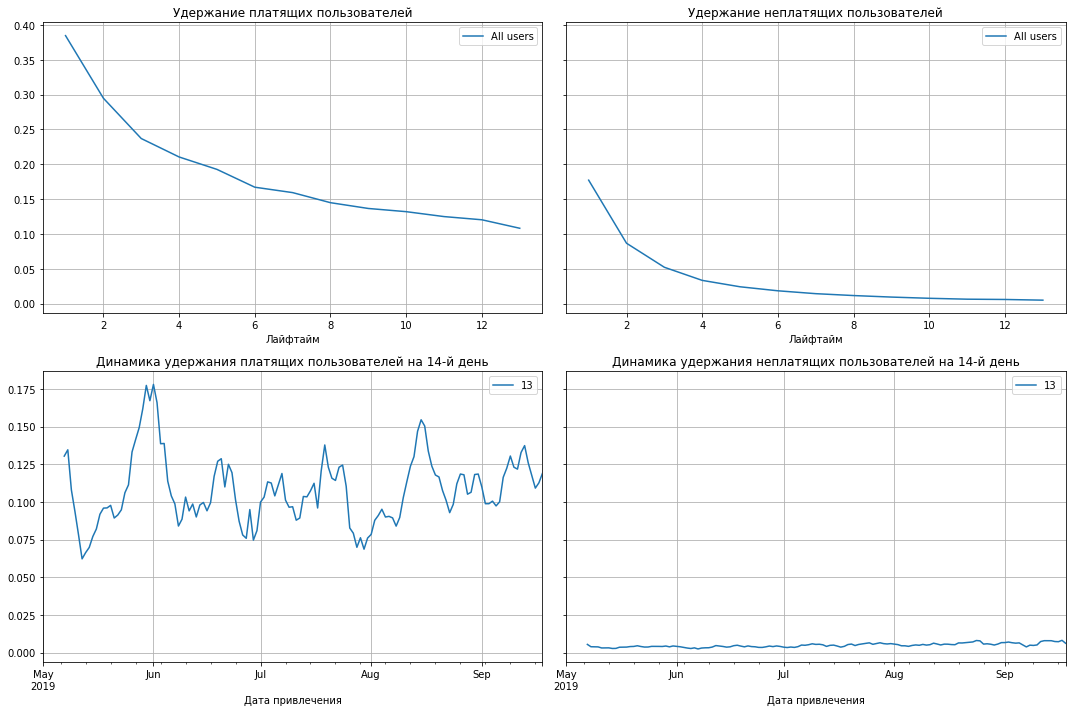

In [48]:
# проверяем удержание пользователей
result_raw, result_grouped, result_in_time = get_retention(
    profiles,
    visits,
    observation_date,
    horizon_day,
    )

plot_retention(result_grouped, result_in_time, horizon_day) 

С удержанием пользователей всё хорошо. Соответсвует стандартной картине для данного приложения (интуитивно)

**Промежуточный вывод**
* С конверсием и удержанием всё в норме

На этом этапе никаких проблем не выявлено

#### Окупаемость рекламы с разбивкой по устройствам

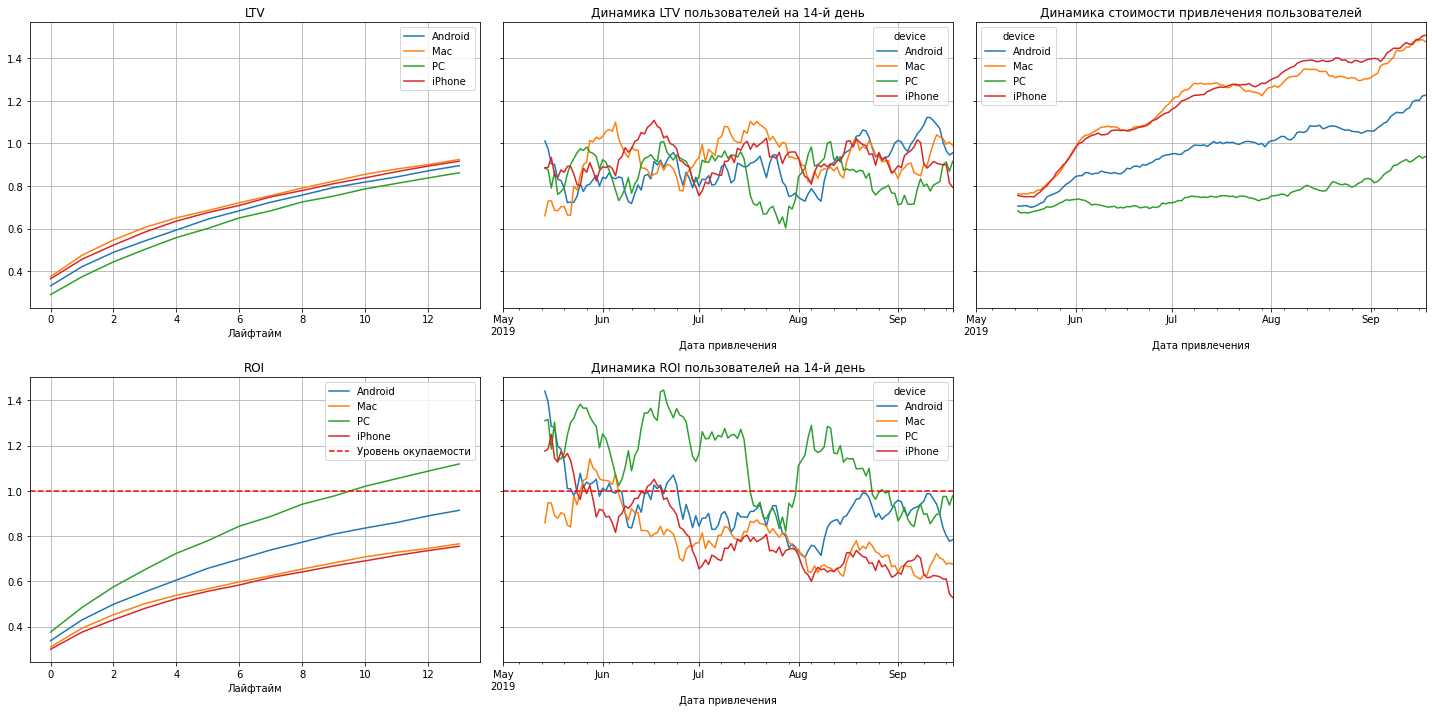

In [49]:
#задаём условия для разбивки
dimensions = ['device']

# зададим горизонт и момент анализа
observation_date = datetime(2019,10,1).date() #дата наблюдения
horizon_day = 14 #горизонт анализа
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles,orders,observation_date,horizon_day,dimensions)

#строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_day,window = 14)

**Промежуточный вывод**
* LTV для всех устройств стабилен
* Стоимость привлечения клиентов в сентябре выросла для всех устройств - ещё одна причина увеличения трат на рекламу
* Пользователи техники Apple самые дорогие. Самые дешёвые для привлечения пользователи PC
* **ROI :**
  * Ни одно устройство за 3 месяца не превышало уровень окупаемости (только пользователи PC до середины августа были выше границы окупаемости и было 2 кратковременных всплеска выше границы окупаемости у пользователей Android). 
  * Пользователи техники Apple были в 2 раза ниже границы окупаемости.
* Исключаем то что проблема в пользователях, тк если бы была проблема в них выделялся какой-то определённый сегмент пользователей, а не все

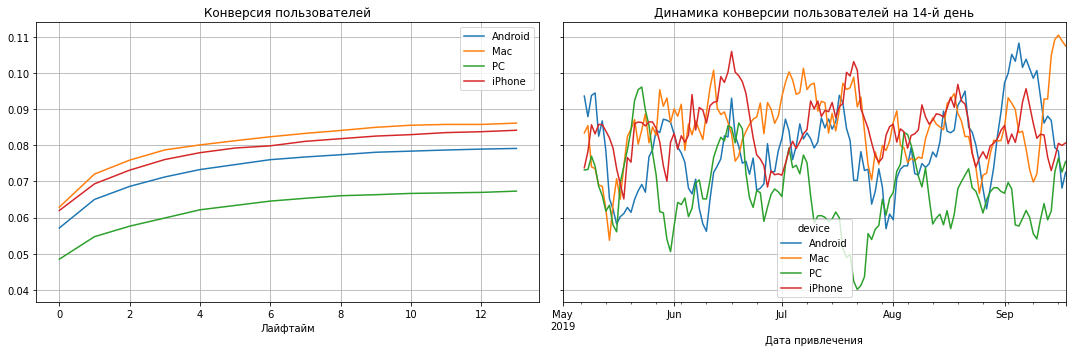

In [50]:
# используем функцию для расчёта конверсии и удержания
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_day,dimensions
)

#строим графики удержания и конверсии
plot_conversion(conversion_grouped, conversion_history, horizon_day,7)


Очень сильно проседает конверсия пользователей для владельцев PC.
Для всех остальных устройств она примрено на одинковом уровне

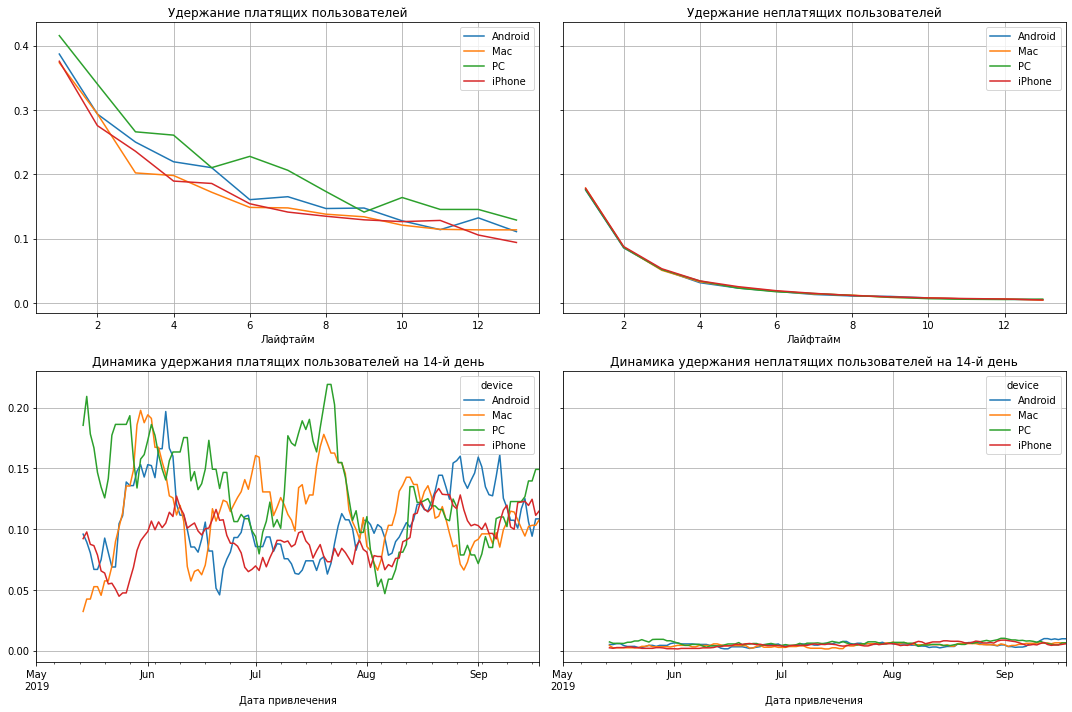

In [51]:

# проверяем удержание пользователей
result_raw, result_grouped, result_in_time = get_retention(
    profiles,
    visits,
    observation_date,
    horizon_day,
    dimensions
    )

plot_retention(result_grouped, result_in_time, horizon_day,window = 14) 

С удержанием картина немного отличаются для пользователей PC она немного лучше чем для других устройств. Все остальные устройства +- на одном и том же уровне. Для пользователей iphone удержание чуть ниже, но я думаю это связано с большим количеством их привлечения (качество пользователей упало)

<p>
  <ul>
      <li> LTV для всех устройств стабилен </li>
      <li> Стоимость привлечения клиентов растёт стабильно для всех устройств выросла для всех устройств - ещё одна причина увеличения трат на рекламу</li>
      <li>Пользователи техники Apple самые дорогие. Самые дешёвые для привлечения пользователи PC</li>
      <li>ROI :</li>
           <ul>
               <li> Падает в начале июня и не поднимается выше границы окупаемости для всех устройств (кроме PC)</li>
               <li> Только пользователи PC более-менее стабильно окупались. Все остальные пользователи устройства стабильно имеют ROI ниже уровня окупаемости.</li>
               <li>Пользователи техники Apple были в 2 раза ниже границы окупаемости.</li>
               <li>Исключаем то что проблема в пользователях, тк если бы была проблема в них выделялся какой-то определённый сегмент пользователей, а не все</li>
     <li> Конверсия устройств пользователей хуже всего у PC </li>
     <li> Удержание для устройств PC лучше чем для остальных. Для всех остальных устройств на одном и том же уровне</li>

</p> 

#### Окупаемость рекламы с разбивкой по странам

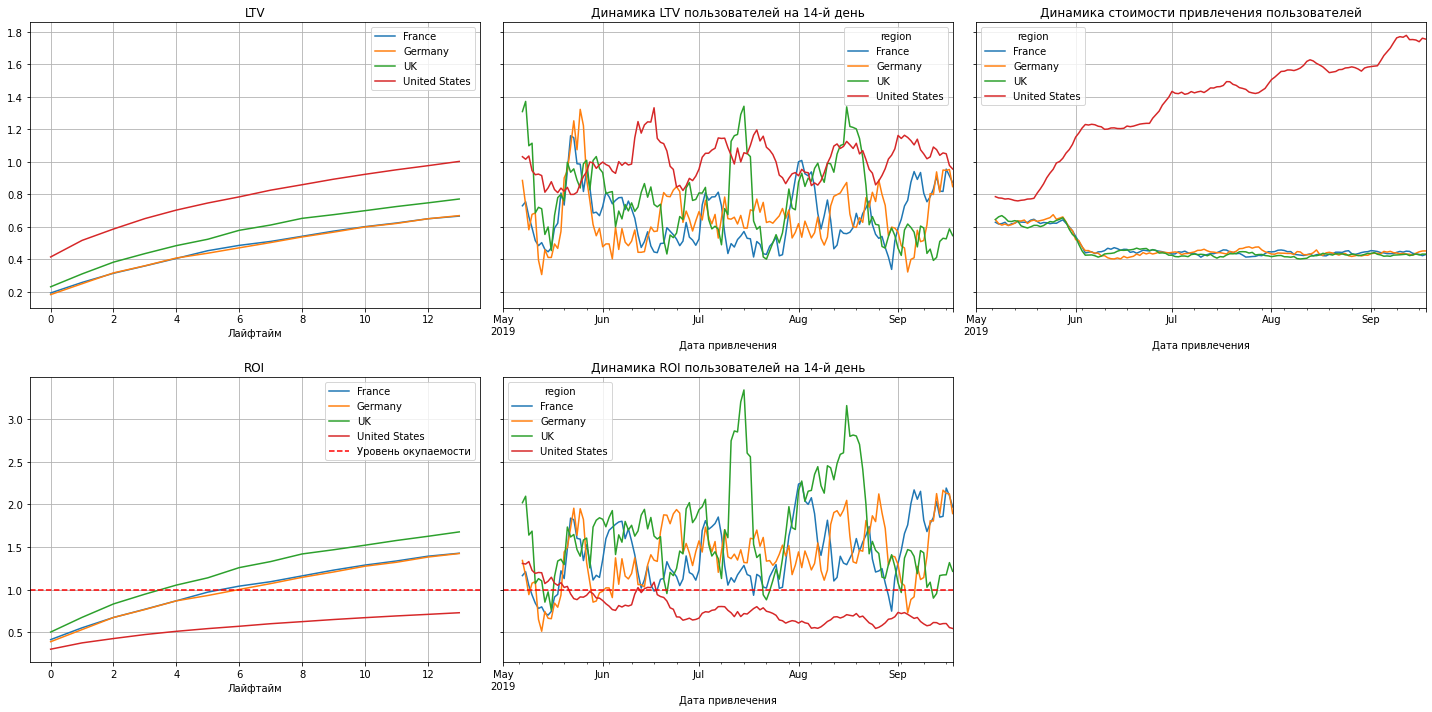

In [52]:
#задаём условия для разбивки
dimensions = ['region']

# зададим горизонт и момент анализа
observation_date = datetime(2019,10,1).date() #дата наблюдения
horizon_day = 14 #горизонт анализа
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles,orders,observation_date,horizon_day,dimensions)

#строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_day,window = 7)

<p>
    <ul>
        <li> Самый высокий LTV у США. Для всех остальных стран он растёт примерно стабильно одинаково </li>
        <li> Цена привлечения одного пользователя для США очень сильно растёт, для других стран падает</li>
        <li> Цена привлечения пользователя из США больше чем цена привлечения пользователя из других стран в 4 раза </li>
        <li> Все страны превышают границу окупаемости, кроме пользователей из США, снижение границы окупаемости для США видно по мере увеличения цена за одного пользователя из США


</p> 

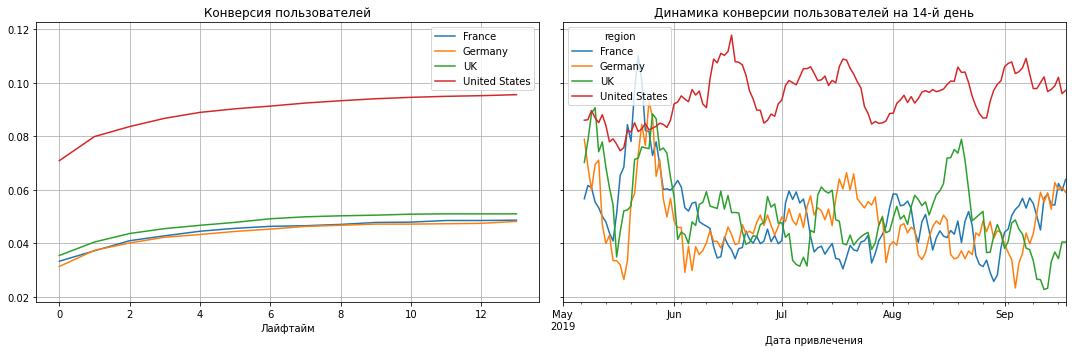

In [53]:
# используем функцию для расчёта конверсии и удержания
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_day,dimensions
)

#строим графики удержания и конверсии
plot_conversion(conversion_grouped, conversion_history, horizon_day)


Рассматриваем платящих пользователей
* Конверсия пользователей из США выше чем для другиз стран в 2 раза
* Для остальных стран конверсия пользователей примерно на одном и том же уровне

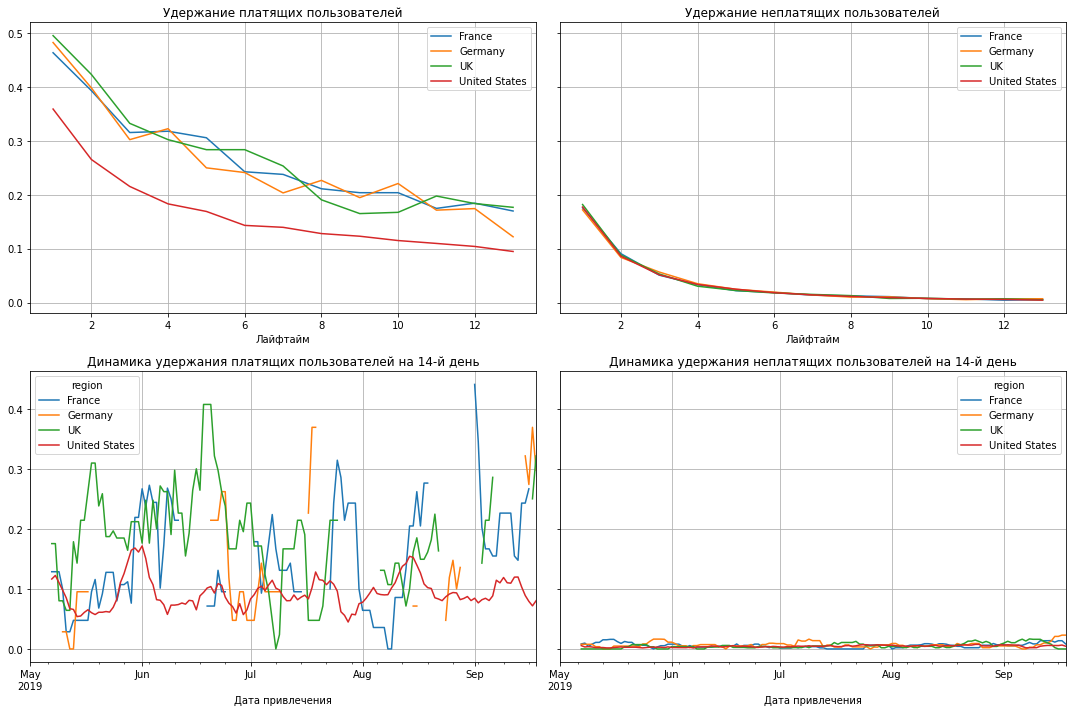

In [54]:
# проверяем удержание пользователей
result_raw, result_grouped, result_in_time = get_retention(
    profiles,
    visits,
    observation_date,
    horizon_day,
    dimensions
    )

plot_retention(result_grouped, result_in_time, horizon_day,window = 7) 

<p>
    <ul>
<li> Пользователи из США имеют самый воский LTV и конверсию, а вот удержание ниже чем в других странах. </li>
<li> У остальных стран этот показатель примерно на одном уровне
    <li> Можно рассмотреть пользователей из США, но стоит значительно уменьшить цену привлечения пользователей из этой страны. Инначе окупиться будет невозможно


</p> 

#### Окупаемость рекламы с разбивкой по рекламным каналам

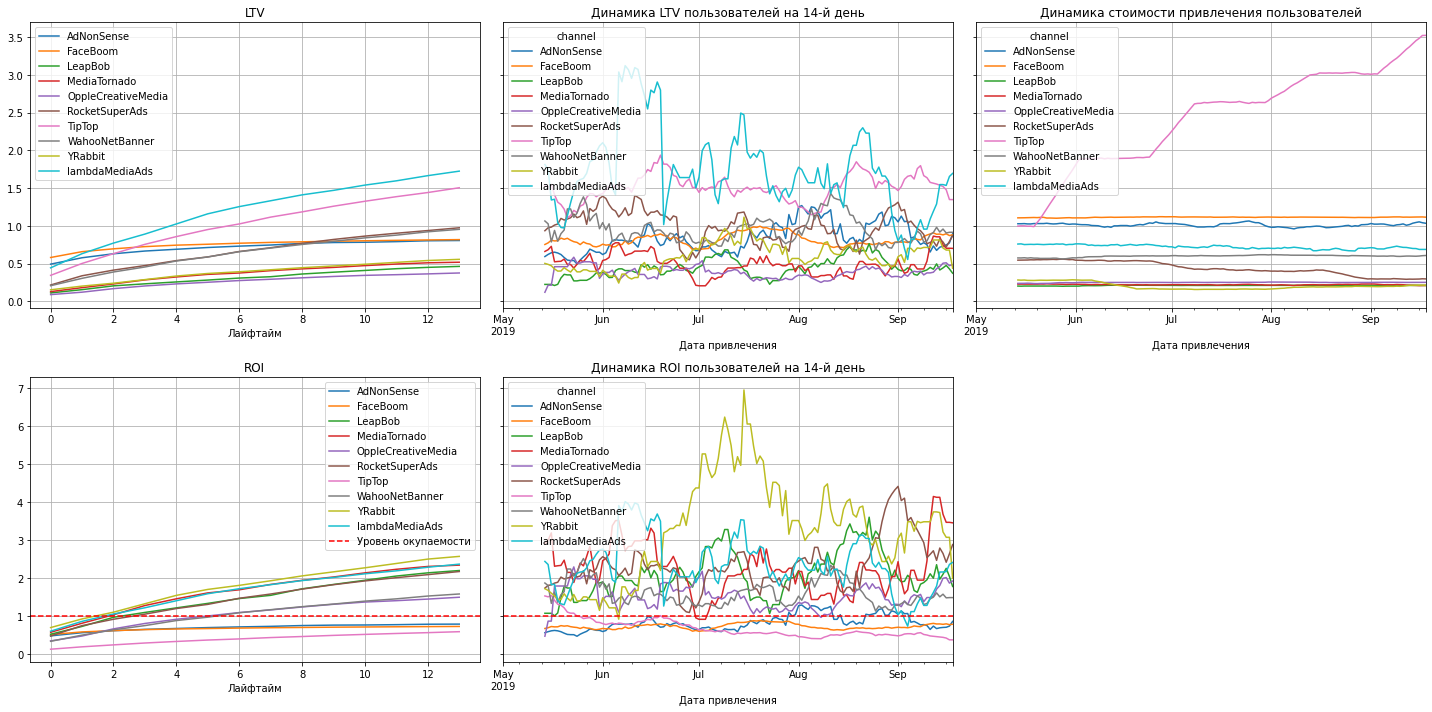

In [55]:
#задаём условия для разбивки
dimensions = ['channel']

# зададим горизонт и момент анализа
observation_date = datetime(2019,10,1).date() #дата наблюдения
horizon_day = 14 #горизонт анализа
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles,orders,observation_date,horizon_day,dimensions)

#строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_day,window = 14)

In [56]:
# на конец недели
ltv_grouped[13].sort_values(ascending = False)

channel
lambdaMediaAds        1.723943
TipTop                1.504062
RocketSuperAds        0.973786
WahooNetBanner        0.953098
FaceBoom              0.816994
AdNonSense            0.805054
YRabbit               0.555585
MediaTornado          0.517534
LeapBob               0.462123
OppleCreativeMedia    0.374954
Name: 13.0, dtype: float64

* Самый высокий LTV у каналов:
  * TipTop
  * AdNoNSense
* Часть каналов имеют очень низкий LTV
  * OppleCreativeMedia ------   0.377082
  * MediaTornado       ------   0.468423
  * LeapBob            ------   0.509778
* У всех каналов стоимости привлечения пользователей не менялась, кроме **TipTop** (с сентября)
* Большинство каналов преодолевают уровень окупаемости через неделю, кроме:
  * TipTop - имеет самый высокий LTV и самую высокую стоимость привлечения (скорее всего пользоавтели которые привлекаются покупают подписку, но она дешевле чем стоимость привлечения пользователя)
  * AdNoNSense - та же причина что и для TipTop
  * FaceBoom - LTV практически не растёт, а цена выше чем для конкурентов. Скорее всего привлекаемые пользователи 'плохого' качества

Рассмотрим платформы которые не пересекают уровень окупаемости

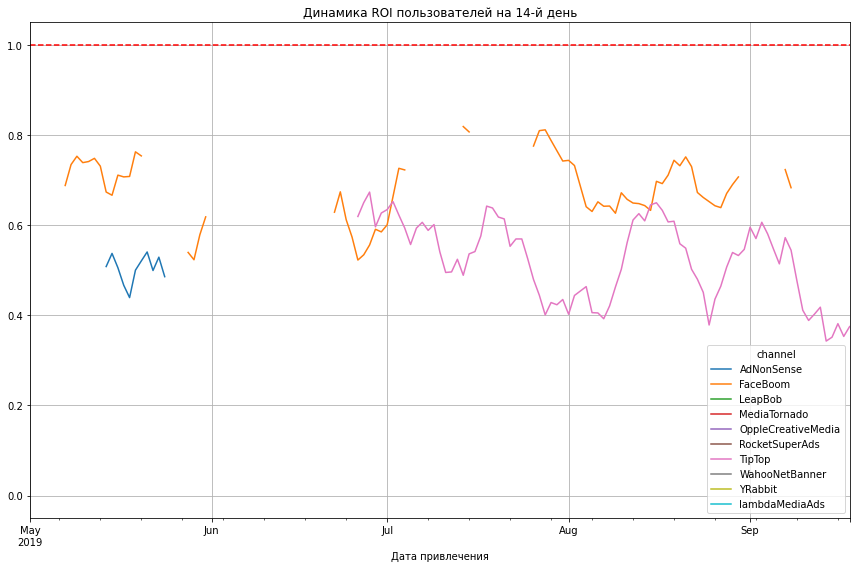

In [57]:
# оставляем каналы у которых roi был меньше 1
roi_history_redact = roi_history[roi_history[13] < 1]


columns = [name for name in roi_history_redact.index.names if name not in ['dt']]
filtered_data = roi_history_redact.pivot_table(
        index='dt', columns=columns, values=14 - 1, aggfunc='mean'
    )
filter_data(filtered_data, 7).plot(grid=True, figsize=(12,8))
plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
plt.xlabel('Дата привлечения')
plt.title('Динамика ROI пользователей на {}-й день'.format(14))

plt.tight_layout()
plt.show() 

In [58]:
# каналы у которых общий roi на конец 2 недели меньше уровня окупаемости
roi_grouped_min = roi_grouped[roi_grouped[13]<1].reset_index()
roi_grouped_min['channel'].unique()

array(['AdNonSense', 'FaceBoom', 'TipTop'], dtype=object)

Именно в эти каналы были вложена большая часть денег. Вот он и корень всех проблем.

FaceBoom,TipTop - в эти два канала привлечения пользователей была вложена основная доля рекламного бюджета

Рассмотрим топ каналов привлечения клиентов с наибольшим ROI

In [59]:
roi_grouped[13].sort_values(ascending = False)

channel
YRabbit               2.574721
lambdaMediaAds        2.371696
MediaTornado          2.345182
LeapBob               2.203408
RocketSuperAds        2.177064
WahooNetBanner        1.587212
OppleCreativeMedia    1.501268
AdNonSense            0.795612
FaceBoom              0.734015
TipTop                0.596367
Name: 13.0, dtype: float64

In [60]:
#стоимость привлечения пользователя
mean_acquisition_cost.sort_values(by = 'acquisition_cost', ascending = False)

,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


Именно на эти каналы стоит обратить внимание при формирование новой маркетинговой стратегии

<p>
    <ul>
        <li> Самый высокий LTV у каналов: TipTop (самая высокая стоимость привлечения пользователей), lambdaMediaAds (1 место) </li>
        <li> Каналы в которые вложеные средства не окупаются: 'AdNonSense', 'FaceBoom', 'TipTop'. Такие каналы не стоит рассматривать.</li>
        <li> Стоит рассмотреть каналы у которых стоимость привлечения одного клиента не превышает ROI и LTV. Исходя из этих данных можно выделить каналы:
            <ul>
                <li>lambdaMediaAds </li>
                <li> YRabbit </li>
                <li> MediaTornado </li>
                <li> LeapBob </li>
                <li> RocketSuperAds </li>
                <li> WahooNetBanner </li>
            </ul>
            
</p> 

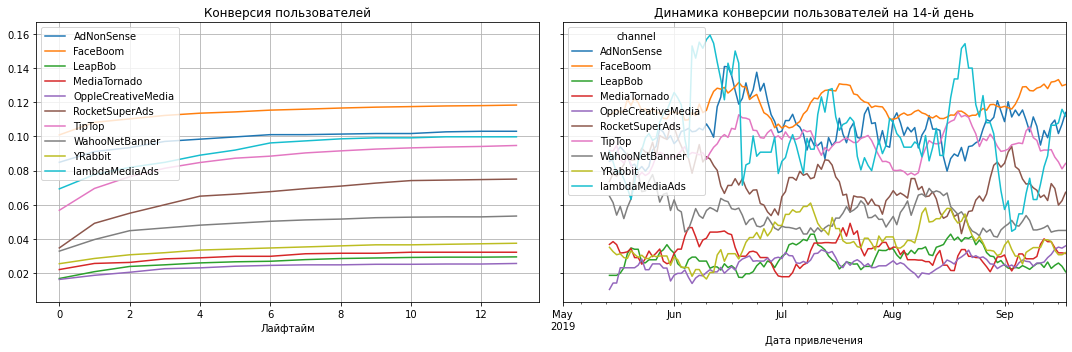

In [61]:
# используем функцию для расчёта конверсии и удержания
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_day,dimensions
)

#строим графики удержания и конверсии
plot_conversion(conversion_grouped, conversion_history, horizon_day,window = 14)


In [62]:
conversion_grouped[13].sort_values(ascending = False)

channel
FaceBoom              0.118345
AdNonSense            0.103004
lambdaMediaAds        0.099761
TipTop                0.094690
RocketSuperAds        0.075022
WahooNetBanner        0.053381
YRabbit               0.037458
MediaTornado          0.032200
LeapBob               0.029478
OppleCreativeMedia    0.025624
Name: 13.0, dtype: float64

Хоть каналы 'AdNonSense', 'FaceBoom', 'TipTop' и имеют высокую конверсию, но они не окупают затраты. 
Рассмотрим лучшую конверсию среди каналов которые выбрали выше:
* lambdaMediaAds - самая высокая конверсия
* RocketSuperAds - на 2 месте по конверсии 
* WahooNetBanner - на 3 месте 
Остальные каналы имеют конверсию ниже 0,05

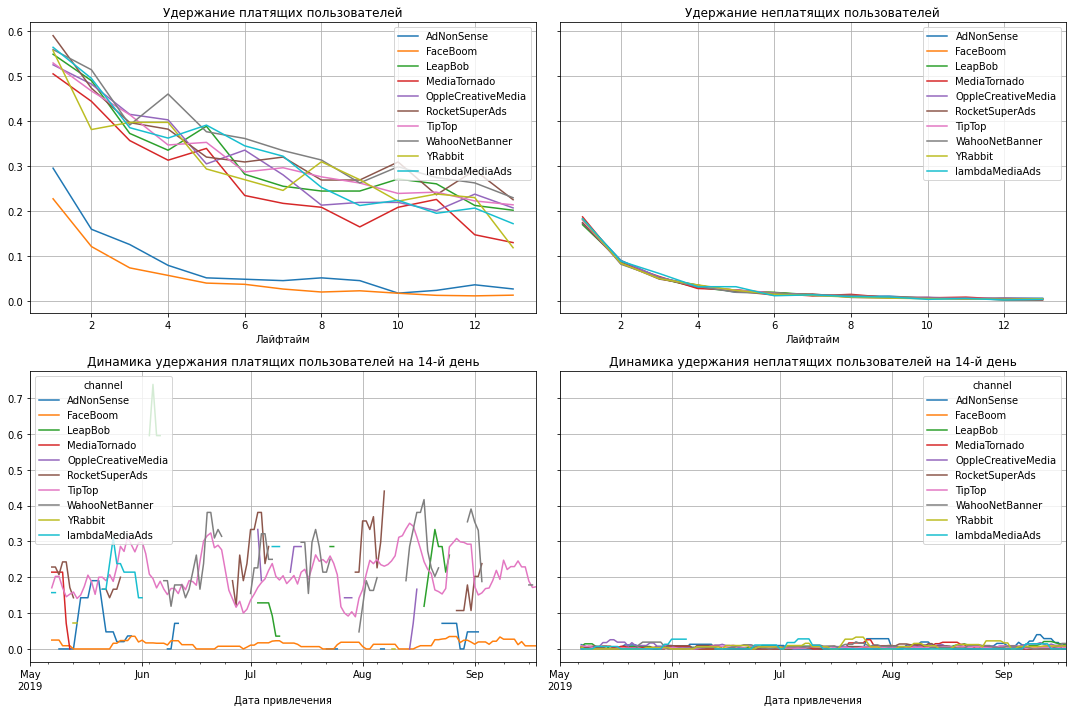

In [63]:

# проверяем удержание пользователей
result_raw, result_grouped, result_in_time = get_retention(
    profiles,
    visits,
    observation_date,
    horizon_day,
    dimensions
    )

plot_retention(result_grouped, result_in_time, horizon_day) 

<p>
    <ul>
        <li> От каналов 'AdNonSense' и 'FaceBoom' и 'TipTop' стоит отказаться
        <li> Каналы в которые были вложены основные средства LTV и ROI не превышал стоимость привлечения одного клиента, хоть они и имели высокую конверсию, но конверсия не едиснтвенный показатель на которой стоит обращать внимание </li>
        <li> AdNonSense' и 'FaceBoom' имеют очень низкие показатели удержания, а это влияет на рентабельност компании</li>
        <li> Были выделены лучшие каналы по совокупности факторов: </li>
            <ul> 
                <li> lambdaMediaAds </li>
                <li> RocketSuperAds </li>
                <li> WahooNetBanner </li>
            </ul>
        <li> Если цель получить кратковременную прибыл стоит отдать приорете пользоватлям из США - они имеют самый высокий LTV, но низкое удержание. У остальных стран удержание выше, а LTV меньше, показатели для всех стран практически одинаковые </li>
        <li> Пользователи PC имеют самую низкую конверсию, но зато самую высокое удержание
    

            
</p> 

#### Вывод окупаемость рекламы

**Выводы на основе данной рекламной кампании**
* Стоит сразу упомянуть тот факт что большое влияние на стоимость одного пользователя сильно сыграли каналы у которых стоимость привлечения очень большая, распределение цены по другим каналам будет примерно такая же, но не с таким большим разбросом как на графике.
* Реклама не окупается, это связано с неправильным выбором каналов для привлечение пользователей (слишком высокая цена для привлечения одного пользователя). Маркетологи скорее всего опирались при выборе пользователей только на долю платящих пользователей и руководствовались правилом "Дороже - значит лучше". Что привело к слишком большим затратам на рекламу, а это привело к высокому уровню окупаемости.Также бюджет был распределён неравномерно
* Устройство пользователя не оказало влияние на данную маркетинговую кампанию. Для всех устройств ROI ниже уровня
* Страна пользователя тоже особо сильно не влияло на окупаемость. Единственная проблема только в том что было привлечено очень много пользователей из США, а они в свою очередь и являлись самыми дорогими (цена привлечения одного пользователя больше минимальной стоимости подписки)
* Негативное влияния оказывают каналы с слишком дорогой стоимость привлечения пользоавтелей: TipTop, FaceBoom,AdNonSense.
* Почему рекламная кампания провалилась: 
  * Большая часть средств была потрачена на 2 канала привлечения пользователей, причём эти каналы имели самые большие цены по привлечению одного пользователя.
  * Большая доля бюджеты была сконцентрирована на пользователях из США, с утройством iphone (также самые дорогие пользователи)

**Ответы на вопросы в общем плане**
* *Окупается ли реклама, направленная на привлечение пользователей в целом?* - да, окупается когда бюджет сформирован и распределён правильно в зависимости от пользователей (каких пользователей лучше выбирать опишу в выводе). Также выбран канал со стоимость привлечение клиента ниже минимальной стоимости покупки (если оплата идёт за покупку подписки, то можно и больше)
<p> Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    <ul> 
        <li> Негативное влияние могут оказать устройства PC - они имеют низкую конверсию, если большую часть средств вложить в этот сегмент пользователей можно прогадать.</li>
        <li> Выделить какую-либо страну нельзя равный LTV имеют все страны кроме США. США имеют хорошую конверсию, но плохое удержание (В случае с США нужно определиться что нужно быстрая окупаемость или долгосрочный заработок). При распределение средств между странами нуэно смотреть на динамику.
        <li> Плохое влияния оказывают каналы:
            <ul>
                <li> С слишком высокой стоимостью привлечения одного пользователя</li>
                <li> LTV ниже стоимости привлечения пользователя (что и произошло в рассматриваемом проекте. Все показатели были хороший, но цена привлечения пользователя оказалась слишком высокой)</li>
                <li> Компании с низкой конверсией</li>
            </ul>
 </p>
* *Чем могут быть вызваны проблемы окупаемости?* - высокой стоимостью привлечения клиента, нестабильностью приложения, колебаниями на рынках стран, выбрано непопулярное устройство для привлечения клиентов (windows phone, как пример)))



**Общие выводы**
  * От устройства сильно не зависит окупаемость рекламы. Но стоит заметить что пользователи техники apple имеют самую высокую долю платящих пользователей.
  * От страны зависит окупаемость (но не критично), пользователи из США имеют наибольшую долю платящих пользователей. Для остальных стран он примерно на одном и том же уровне (ниже США в 2 раза). Остальные страны превышают уровень окупаемости, но могут происходить спады. Исходя из полученных графиков видно что в Англии спад продаж и ROI иногда опусакется ниже уровня окупаемости. Но нельзя не упомянуть о том что при смене каналов и следовательно уменьшение цене привлечённого пользователя уровень окупаемости тоже снизится и скорее всего ROI стран перестанет опускаться ниже этого уровня.Польностью исключать страны не самый лучший вариант, лучше распределить бюджет между Англией,Францией и Германией равномерно (допустить отклонение опираясь на долю платящих пользователей)
  * Стоит не рассматривать каналы у которых стоимость привлечения одного пользователя больше минимальной цены подписки.


### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

* Причины неэффективность рекламной кампании:
  * Средства были распределены неправильно:
    * Большая часть средства была распределена между 2-мя каналами с самой высокой стоимость привлечения пользователя
    * Большая часть средств была выделена на пользователей из США - самые дорогие пользователи
    * Большая часть средств была выделена на пользователей iphone - самые дорогие пользователи
    * Рекламная кампания основывалась на правиле дороже-значит лучше, что привело к высокому уровню окупаемости

<p>
    <p> Рекомендации для отдела маркетинга:
        <ul>
            <li> Отказаться от каналов привлечения пользователей TipTop,FaceBoom и AdNonSense - самые дорогие по стоимости привлечения пользователей. Вложения не окупаются.</li>
            <li> Рекомендуемые каналы привлечения пользователей: </li>
            <ul>
                <li> lambdaMediaAds </li>
                <li> RocketSuperAds </li>
                <li> WahooNetBanner </li>
            </ul> 
            <li> Рекомендации по пользователям: </li>
            <ul>
                <li> Если нужна быстрая прибыль:</li>
                    <ul>
                        <li> Пользователи из США </li>
                        <li> Пользователи техники Apple сконцентрировать на них 60% бюджета </li>
                        <li> 30% пользователи Android </li>
                        <li> Оставщиеся средства пользователям PC </li>
                    </ul>
                <li> Если нужна прибыль в долгосрочной перспективе:</li>
                    <ul> По стране:
                         <li>40% Сконцентрировать на США (имеет меньшую долю удержания, но LTV больше)</li>
                         <li>Остальные средства распределить между странами</li>
                    </ul>
                    <ul> По устройству:
                        <li> Распределить средства равномерно между устройствами </li>
                    </ul>
            
              
                    
                
        

    
            
</div> 